<a href="https://colab.research.google.com/github/gitmystuff/INFO5737/blob/main/NIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Intrusion Detection System (NIDS)

## Network Overview

### OSI and TCP/IP 5 Layer Models

* https://www.imperva.com/learn/application-security/osi-model/
* https://microchipdeveloper.com/tcpip:tcp-ip-five-layer-model


### Protocols

https://www.guru99.com/layers-of-osi-model.html

* Physical: Ethernet hub, repeater
* Data Link: Ethernet switch, MAC
* Network: IP, ICMP
* Transport: TCP, UDP
* Session: Sockets, API sessions - allows an application to accomplish certain high-level communications over the network easily
* Presentation: PNG, GIF, PDF, translate, encrypt
* HTTP, SMTP

### Access Control and Authentication

* Firewalls
* Access control lists
* Multifactor authentication

### Intrusion Detection and Pattern Mining

* Packet sniffing
* Encryption
* TCP three-way handshake - https://www.techopedia.com/definition/10339/three-way-handshake, https://wiki.wireshark.org/TCP_3_way_handshaking.md
* TLS handshake - https://www.cloudflare.com/learning/ssl/what-happens-in-a-tls-handshake/

## Analyzing Network Traffic

### The Machine Learning Lifecycle

* Identify the problem
* Identify the data source
* Identify independent / dependend variables
* Split data before processing ???
* Identify duplicate features, highly correlated features, outliers, data validity, missingness
* Explore the data (EDA)
* Feature engineering and selection
* One-hot encoding
* Scaling
* Over / under sampling
* Split data ???
* Identify model assumptions
* Build model
* Test model
* Tune model
* Cross validate
* Adjust bias-variance (tradeoff)
* Adjust overfitting / underfitting
* Predict
* Deploy

https://www.analyticsvidhya.com/blog/2021/05/machine-learning-life-cycle-explained/

### KDD99 Dataset vs Packet

* https://www.researchgate.net/profile/Jill-Slay/publication/290061926_The_evaluation_of_Network_Anomaly_Detection_Systems_Statistical_analysis_of_the_UNSW-NB15_data_set_and_the_comparison_with_the_KDD99_data_set/links/59d9cf58aca272e6096bbfcb/The-evaluation-of-Network-Anomaly-Detection-Systems-Statistical-analysis-of-the-UNSW-NB15-data-set-and-the-comparison-with-the-KDD99-data-set.pdf

In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import requests

url = 'https://raw.githubusercontent.com/gitmystuff/Linkables/main/kdd99cup_attack_types.txt'
response = requests.get(url)
data = response.text
print(data)
data = data.splitlines()
print(data)

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


['back dos', 'buffer_overflow u2r', 'ftp_write r2l', 'guess_passwd r2l', 'imap r2l', 'ipsweep probe', 'land dos', 'loadmodule u2r', 'multihop r2l', 'neptune dos', 'nmap probe', 'perl u2r', 'phf r2l', 'pod dos', 'portsweep probe', 'rootkit u2r', 'satan probe', 'smurf dos', 'spy r2l', 'teardrop dos', 'warezclient r2l', 'warezmaster r2l', '']


In [ ]:
from collections import defaultdict
import requests

category = defaultdict(list)
category['benign'].append('normal')

for line in data:
  if len(line.strip().split(' ')) > 1:
    attack, cat = line.strip().split(' ')
    category[cat].append(attack)

for key, value in category.items():
  print(f'{key}:{value}')

benign:['normal']
dos:['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']
u2r:['buffer_overflow', 'loadmodule', 'perl', 'rootkit']
r2l:['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster']
probe:['ipsweep', 'nmap', 'portsweep', 'satan']


In [ ]:
# attack mapping
attack_mapping = dict((v, k) for k in category for v in category[k])
attack_mapping

{'normal': 'benign',
 'back': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'smurf': 'dos',
 'teardrop': 'dos',
 'buffer_overflow': 'u2r',
 'loadmodule': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'ipsweep': 'probe',
 'nmap': 'probe',
 'portsweep': 'probe',
 'satan': 'probe'}

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/gitmystuff/Linkables/main/kddcup.names.txt'
response = requests.get(url)
names = response.text
print(names)
names =names.splitlines()
print(names)

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
# get continuous and symbolic features (categorical)
feature_names = defaultdict(list)

for line in names[1:]:
  name, nature = line.strip()[:-1].split(': ')
  feature_names[nature].append(name)

for key, value in feature_names.items():
  print(f'{key}:{value}')

continuous:['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
symbolic:['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']


In [ ]:
# # get continuous and symbolic features (categorical)
# feature_names = defaultdict(list)

# with open('kddcup.data/kddcup.names.txt', 'r') as f:
#     for line in f.readlines()[1:]:
#         name, nature = line.strip()[:-1].split(': ')
#         feature_names[nature].append(name)

# for key, value in feature_names.items():
#     print(f'{key}:{value}')

### Continuous vs Discrete

From https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/discrete-vs-continuous-variables/ and https://www.g2.com/articles/discrete-vs-continuous-data (November 4, 2021)

* Discrete variables are countable in a finite amount of time. For example, you can count the change in your pocket and can count the money in your bank account
* Continuous variables refer to the unspecified nmber of possible measurements and are often expressed using decimal points such as random variables, line graphs, and are used in regression analysis

In [ ]:
# categorize features
continuous_features = feature_names['continuous']
continuous_features.remove('root_shell')
binary_features = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
nominal_features = list(set(feature_names['symbolic']) - set(binary_features))

### Pandas

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/

In [ ]:
cols = []
for line in names[1:]:
  cols.append(line.strip().split(' ')[0][:-1])

cols.extend(['attack_type', 'a_val'])
print(cols)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'a_val']


In [ ]:
import pandas as pd

# read the kddcup dataset
df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/KDDTrain.csv', index_col=False, names=cols)
# df['attack_type'] = df['attack_type'].apply(lambda w: w[:-1])
df['attack_category'] = df['attack_type'].map(lambda x: attack_mapping[x])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,a_val,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,benign
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,benign
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,benign
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,benign


In [ ]:
# check out the number of rows and columns
df.shape

(125973, 44)

<Axes: ylabel='attack_type'>

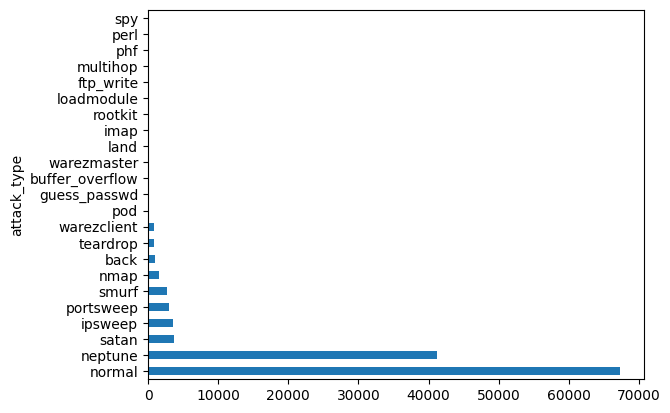

In [ ]:
import matplotlib.pyplot as plt

train_attack_types = df['attack_type'].value_counts()
train_attack_types.plot(kind='barh')

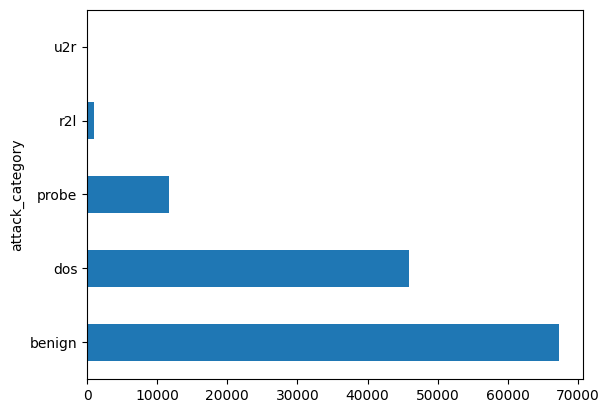

In [ ]:
train_attack_cats = df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh');

https://kdd.ics.uci.edu/databases/kddcup99/task.html

* DOS: denial-of-service, e.g. syn flood;
* R2L: unauthorized access from a remote machine, e.g. guessing password;
* U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
* probing: surveillance and other probing, e.g., port scanning.

In [ ]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['attack_category', 'attack_type', 'a_val'], axis=1),
                                                            df['attack_category'],
                                                            test_size = 0.2,
                                                            random_state = 42)

In [ ]:
# see data types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100778 entries, 95141 to 121958
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     100778 non-null  int64  
 1   protocol_type                100778 non-null  object 
 2   service                      100778 non-null  object 
 3   flag                         100778 non-null  object 
 4   src_bytes                    100778 non-null  int64  
 5   dst_bytes                    100778 non-null  int64  
 6   land                         100778 non-null  int64  
 7   wrong_fragment               100778 non-null  int64  
 8   urgent                       100778 non-null  int64  
 9   hot                          100778 non-null  int64  
 10  num_failed_logins            100778 non-null  int64  
 11  logged_in                    100778 non-null  int64  
 12  num_compromised              100778 non-null  int64  
 13  

### One-Hot Encoding

only one of the dummy variables can have the value, thus hot

https://chrisalbon.com/code/machine_learning/preprocessing_structured_data/one-hot_encode_nominal_categorical_features/

In [ ]:
# see how many categories in each feature
print(len(X_train.protocol_type.value_counts()))
print(len(X_train.service.value_counts()))
print(len(X_train.flag.value_counts()))

3
70
11


In [ ]:
# # create dummy variables
# print(X_train.shape)
# X_train = pd.get_dummies(X_train, drop_first=True)
# print(X_train.shape)
# X_test = pd.get_dummies(X_test, drop_first=True)
# print(X_test.shape)

In [ ]:
for feat in ['service', 'flag']:
  freq = X_train.groupby(feat).size()/len(df)
  X_train[feat] = X_train[feat].map(freq)
  X_test[feat] = X_test[feat].map(freq)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100778 entries, 95141 to 121958
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     100778 non-null  int64  
 1   protocol_type                100778 non-null  object 
 2   service                      100778 non-null  float64
 3   flag                         100778 non-null  float64
 4   src_bytes                    100778 non-null  int64  
 5   dst_bytes                    100778 non-null  int64  
 6   land                         100778 non-null  int64  
 7   wrong_fragment               100778 non-null  int64  
 8   urgent                       100778 non-null  int64  
 9   hot                          100778 non-null  int64  
 10  num_failed_logins            100778 non-null  int64  
 11  logged_in                    100778 non-null  int64  
 12  num_compromised              100778 non-null  int64  
 13  

In [ ]:
# using one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse_output=False, handle_unknown='ignore')

cat_features = ['protocol_type']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(cat_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(cat_features, axis=1, inplace=True)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100778 entries, 95141 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     100778 non-null  int64  
 1   service                      100778 non-null  float64
 2   flag                         100778 non-null  float64
 3   src_bytes                    100778 non-null  int64  
 4   dst_bytes                    100778 non-null  int64  
 5   land                         100778 non-null  int64  
 6   wrong_fragment               100778 non-null  int64  
 7   urgent                       100778 non-null  int64  
 8   hot                          100778 non-null  int64  
 9   num_failed_logins            100778 non-null  int64  
 10  logged_in                    100778 non-null  int64  
 11  num_compromised              100778 non-null  int64  
 12  root_shell                   100778 non-null  int64  
 13  

In [ ]:
# verify shapes
print(set(X_train.columns) - set(X_test.columns))
print(X_train.shape)
print(X_test.shape)

set()
(100778, 42)
(25195, 42)


In [ ]:
# see the spread of our data
# X_train.drop(df[binary_features], axis=1).describe()
X_train[continuous_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,100778.0,284.319157,2.590917e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,100778.0,47103.668112,6.256697e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,100778.0,23835.254560,4.495675e+06,0.0,0.00,0.00,521.00,1.309937e+09
wrong_fragment,100778.0,0.022426,2.520704e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,100778.0,0.000139,1.606163e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,100778.0,0.204062,2.150145e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,100778.0,0.001191,4.340430e-02,0.0,0.00,0.00,0.00,4.000000e+00
num_compromised,100778.0,0.307567,2.646441e+01,0.0,0.00,0.00,0.00,7.479000e+03
su_attempted,100778.0,0.001171,4.692028e-02,0.0,0.00,0.00,0.00,2.000000e+00
num_root,100778.0,0.332960,2.691215e+01,0.0,0.00,0.00,0.00,7.468000e+03


### Scaling

Standard Scaling:
* -3 to 3
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

MinMax Scaling:
* 0 - 1
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

In [ ]:
# standard scaler demo
from sklearn.preprocessing import StandardScaler

durations = X_train['count'].values.reshape(-1, 1)
standard_scaled_data = StandardScaler().fit_transform(durations)
pd.Series(standard_scaled_data.flatten()).describe()

count    1.007780e+05
mean    -4.258547e-17
std      1.000005e+00
min     -7.355599e-01
25%     -7.180779e-01
50%     -6.131860e-01
75%      5.144014e-01
max      3.731085e+00
dtype: float64

In [ ]:
# minmaxscaler demo
from sklearn.preprocessing import MinMaxScaler

durations = X_train['count'].values.reshape(-1, 1)
scaled_data = MinMaxScaler().fit_transform(durations)
pd.Series(scaled_data.flatten()).describe()

count    100778.000000
mean          0.164678
std           0.223883
min           0.000000
25%           0.003914
50%           0.027397
75%           0.279843
max           1.000000
dtype: float64

In [ ]:
# scale our data (deleted fit_ for X_test)
X_train[continuous_features] = StandardScaler().fit_transform(X_train[continuous_features])
X_test[continuous_features] = StandardScaler().transform(X_test[continuous_features])
X_train.drop(df[binary_features], axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,100778.0,6.504154e-18,1.000005,-0.109737,-0.109737,-0.109737,-0.109737,16.451276
service,100778.0,1.189869e-01,0.103628,0.000008,0.019393,0.057584,0.256190,0.256190
flag,100778.0,3.512112e-01,0.159546,0.000286,0.221333,0.475975,0.475975,0.475975
src_bytes,100778.0,2.291437e-18,1.000005,-0.007529,-0.007529,-0.007522,-0.007484,220.551461
dst_bytes,100778.0,2.996494e-19,1.000005,-0.005302,-0.005302,-0.005302,-0.005186,291.373388
wrong_fragment,100778.0,1.632208e-17,1.000005,-0.088966,-0.088966,-0.088966,-0.088966,11.812531
urgent,100778.0,2.256184e-18,1.000005,-0.008649,-0.008649,-0.008649,-0.008649,186.772779
hot,100778.0,1.734441e-17,1.000005,-0.094907,-0.094907,-0.094907,-0.094907,35.716812
num_failed_logins,100778.0,1.212699e-17,1.000005,-0.027434,-0.027434,-0.027434,-0.027434,92.129799
num_compromised,100778.0,2.115172e-19,1.000005,-0.011622,-0.011622,-0.011622,-0.011622,282.595742


### Decision Tree Classifier

* https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-decision-tree-classification-using-python/

### Metrics

* Confusion Matrix: https://stackoverflow.com/questions/35178590/scikit-learn-confusion-
* Accuracy: https://developers.google.com/machine-learning/crash-course/classification/accuracy
* Zero-One Loss: https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-30164-8_884

In [ ]:
print(X_train.shape)
X_train.isnull().sum()

(100778, 42)


duration                       0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [ ]:
# create model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Test Score: {accuracy_score(y_test, y_pred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[[12964   107   302    48     1]
 [  210  8965     5     1     0]
 [  355    14  1987     1     0]
 [  144     1     1    78     0]
 [    6     0     0     3     2]]
Training Score: 0.953571215939987
Test Score: 0.9524111926969637


In [ ]:
# y_pred with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f'Error: {zero_one_loss(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[12078   161  1036    54    93]
 [  126  8636   405    13     1]
 [  848    54  1453     2     0]
 [   33     2    65    15   109]
 [    2     0     1     1     7]]
Error: 0.11930938678309189
Accuracy: 0.8806906132169081


<Axes: ylabel='attack_category'>

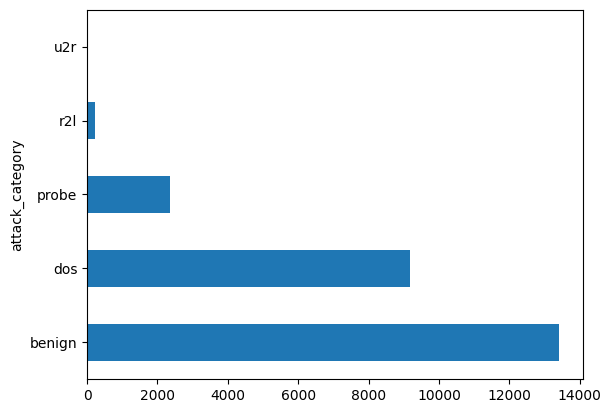

In [ ]:
# recall our attack categories
y_test.value_counts().plot(kind='barh')

### KNeighbors

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

k in k nearest neighbors: https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm

Imagine you have a bunch of data points scattered on a graph, each labeled with a specific category (like "cat" or "dog"). Now, you have a new, unlabeled data point, and you want to figure out what category it belongs to.

Here's where KNeighbors comes in. It operates on a simple principle: **birds of a feather flock together**.

1.  **Choose your 'K':** The first step is to decide on a value for 'K'. This 'K' represents the number of nearest neighbors you'll consider. For example, if you choose K=3, the algorithm will look at the three data points closest to your new, unlabeled point.

2.  **Find the Nearest Neighbors:** The algorithm then calculates the "distance" between your new data point and all the other labeled data points. This distance can be measured in various ways, but the most common is the Euclidean distance (the straight-line distance you probably learned in geometry). It identifies the 'K' labeled data points that are closest to your new point based on this distance.

3.  **Make the Prediction:** Finally, the algorithm looks at the categories of these 'K' nearest neighbors.

    * **For Classification:** If you're trying to classify your new point into a category (like "cat" or "dog"), the algorithm counts how many of its 'K' nearest neighbors belong to each category. The new point is then assigned to the category that has the **majority** among its neighbors. For instance, if out of the 3 nearest neighbors, 2 are "cats" and 1 is a "dog", the new point would be classified as a "cat".

    * **For Regression:** If you're trying to predict a continuous value (like the price of a house), the algorithm typically takes the **average** (or sometimes the median) of the target values of its 'K' nearest neighbors.

**Think of it this way:** If you move into a new neighborhood and want to guess what kind of person your new neighbor is, you might look at the people living closest to their house. If most of them are artists, you might guess your new neighbor is also an artist.

**Key Characteristics of KNeighbors:**

* **Non-parametric:** It doesn't make any assumptions about the underlying distribution of the data. This makes it quite flexible.
* **Instance-based (or Memory-based):** It memorizes the training data and makes predictions based directly on these instances.
* **Lazy Learner:** It doesn't learn a discriminative function from the training data but rather waits until a query instance is presented to make a prediction.
* **Sensitive to Feature Scaling:** Features with larger ranges can disproportionately influence the distance calculations. Therefore, it's often important to scale your features (e.g., using standardization or normalization) before applying KNeighbors.
* **The choice of 'K' is crucial:** A small 'K' can make the model sensitive to noise in the data, while a large 'K' can smooth out decision boundaries but might include points from different classes.
* **Computational Cost:** For large datasets, finding the nearest neighbors can be computationally expensive, especially during prediction time.

KNeighbors is a simple yet powerful algorithm that finds applications in various fields, including pattern recognition, image and video recognition, and recommendation systems. It's a great starting point for understanding more complex machine learning algorithms.

Did you have any specific aspects of KNeighbors you were curious about? Perhaps how to choose the optimal 'K' or the different distance metrics?

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# cls = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
# cls.fit(X_train, y_train)
# y_pred = cls.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(f'Error: {zero_one_loss(y_test, y_pred)}')
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

<pre>
[[13382    11    15    12     2]
 [    8  9173     0     0     0]
 [   13     1  2343     0     0]
 [    9     0     6   208     1]
 [    3     0     0     2     6]]
Error: 0.003294304425481287
Accuracy: 0.9967056955745187
</pre>

### Imbalanced Classes

* problem with oversampling is with overfitting
* undersampling discards vast amounts of data
* popular method is to use a combination of oversampling and undersampling to minimize problems with each sampling technique

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [ ]:
# show imbalance of labels
y_train.value_counts()

attack_category
benign    53921
dos       36746
probe      9299
r2l         771
u2r          41
Name: count, dtype: int64

In [ ]:
# resample on train only
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts()

attack_category
benign    53921
dos       53921
probe     53921
r2l       53921
u2r       53921
Name: count, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

mean_size = int(y_train.value_counts().sum()/len(y_train.value_counts()))
ratio = {
    'benign': mean_size,
    'dos': mean_size,
    'probe': mean_size,
    'r21': mean_size,
    'u2r': mean_size
}

rus = RandomUnderSampler(random_state=42, replacement=True)
X_train_rus, y_train_rus = rus.fit_resample(X_train_sm, y_train_sm)
print(y_train_rus.value_counts())

attack_category
benign    53921
dos       53921
probe     53921
r2l       53921
u2r       53921
Name: count, dtype: int64


In [ ]:
# y_pred with DecisionTreeClassifier
cls = DecisionTreeClassifier(random_state=42)
cls.fit(X_train_rus, y_train_rus)
y_pred = cls.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f'Error: {zero_one_loss(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[8593   21 4741   65    2]
 [   6 8412  763    0    0]
 [  14    1 2342    0    0]
 [   5    1  192   26    0]
 [   1    0    4    5    1]]
Error: 0.2310379043461004
Accuracy: 0.7689620956538996


## Transfer Learning

Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.

https://en.wikipedia.org/wiki/Transfer_learning

## Supervised vs Unsupervised Learning

Labels or no labels

### Clustering

Clustering refers to grouping similar samples. KMeans requires knowing centroids

https://en.wikipedia.org/wiki/K-means_clustering#/media/File:K-means_convergence.gif

Determing K:

* The elbow method: https://en.wikipedia.org/wiki/Elbow_method_(clustering)
* The silhouette method: https://en.wikipedia.org/wiki/Silhouette_(clustering)

Completeness score: a cluster is complete (completeness score = 1) if all the data points belonging to the same class are clustered together

Homogeneity score: a cluster is homogeneous (homogeneity score = 1) if all the data points that are clustered together belong to the same class

V-measure: harmonic mean of completeness and homogeneity scores

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html

### Elbows and WCSS

### Within-Cluster Sum of Squares (WCSS)

**WCSS** stands for **Within-Cluster Sum of Squares**. It's a metric used to evaluate the quality of clusters formed by the K-Means algorithm. Here's what it represents:

1.  **Distance to Centroid:** For each data point within a cluster, we calculate the squared Euclidean distance between that data point and its cluster's centroid (the average of all points in the cluster).
2.  **Sum of Squared Distances:** We then sum up these squared distances for all data points within that specific cluster. This gives us the WCSS for that cluster.
3.  **Total WCSS:** Finally, the total WCSS for a given clustering solution is the sum of the WCSS values for all the clusters.

**In essence, WCSS measures the compactness of the clusters.** A lower WCSS generally indicates that the data points within each cluster are closer to their centroid, implying more tightly formed and potentially better clusters.

Mathematically, for $K$ clusters $C_1, C_2, ..., C_K$, the WCSS is calculated as:

$$WCSS = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2$$

where:
* $K$ is the number of clusters.
* $C_i$ is the $i$-th cluster.
* $x$ is a data point in cluster $C_i$.
* $\mu_i$ is the centroid of cluster $C_i$.
* $||x - \mu_i||^2$ is the squared Euclidean distance between the data point $x$ and its centroid $\mu_i$.

**The goal of the K-Means algorithm is to minimize this WCSS.**

### The Elbow Method

The **Elbow Method** is a heuristic technique used to determine the optimal number of clusters ($K$) for a clustering algorithm like K-Means. It works by plotting the WCSS values against the number of clusters ($K$) for a range of possible $K$ values (e.g., from 1 to 10).

Here's how it works:

1.  **Run K-Means for a Range of K:** You start by running the K-Means algorithm multiple times, each time with a different number of clusters ($K$). For each $K$, you calculate the resulting WCSS.
2.  **Plot the Results:** You then plot these WCSS values on a graph, with the number of clusters ($K$) on the x-axis and the WCSS on the y-axis.
3.  **Identify the "Elbow":** The idea is to look for an "elbow" shape in the plot. As you increase the number of clusters, the WCSS will generally decrease because each data point becomes closer to its own centroid (as there are more centroids). However, this decrease will eventually start to diminish. The point where the rate of decrease in WCSS sharply changes, forming an angle or "elbow" in the plot, is often considered a good estimate for the optimal number of clusters ($K$).

**Why does the "elbow" suggest the optimal $K$?**

* **Before the elbow:** Adding more clusters significantly reduces the WCSS, indicating that these new clusters are doing a good job of better separating the data.
* **At the elbow:** This point represents a trade-off. Adding more clusters beyond this point does not result in a substantial decrease in WCSS. It suggests that you might be overfitting the data by creating clusters that are too specific to the training data and might not generalize well to new data.
* **After the elbow:** The WCSS continues to decrease, but at a much slower rate. The benefit of adding more clusters becomes marginal.

**In practice, identifying a clear "elbow" can sometimes be subjective.** The curve might be smooth, or there might be multiple potential elbow points. In such cases, you might need to consider other evaluation metrics or domain knowledge to make the final decision about the number of clusters.

**In summary:**

* **WCSS** is a metric that quantifies the total within-cluster variance. Lower WCSS is generally better.
* The **Elbow Method** uses the trend of WCSS as the number of clusters ($K$) increases to visually identify a potential optimal $K$ at the "elbow" point of the plot. It's a helpful visual aid for choosing the right number of clusters in K-Means.

In [ ]:
# code example
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target    name  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


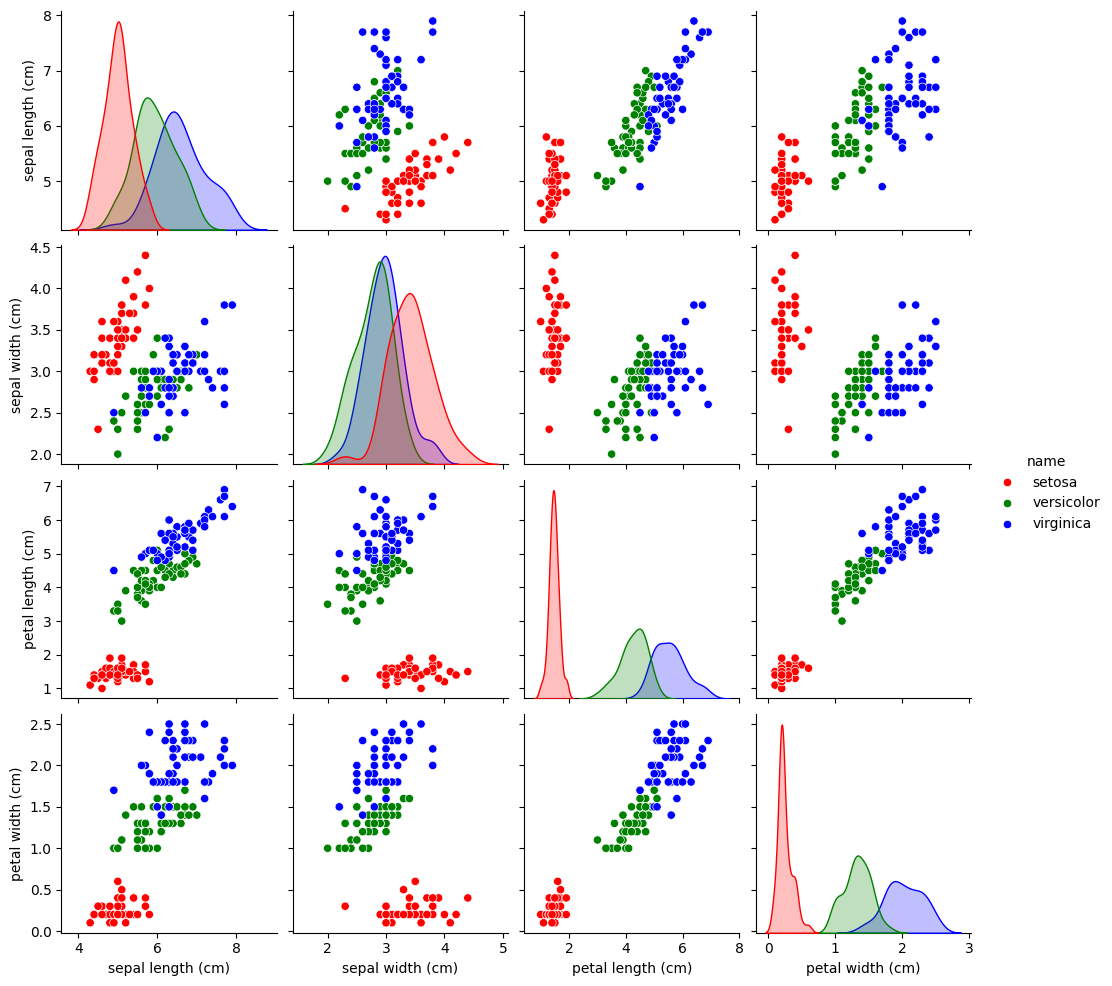

In [ ]:
# pairplot of iris
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style('whitegrid')
colors = ['red', 'green', 'blue']
sns.set_palette(sns.color_palette(colors))
sns.pairplot(df.drop('target', axis=1), hue='name')
plt.show()

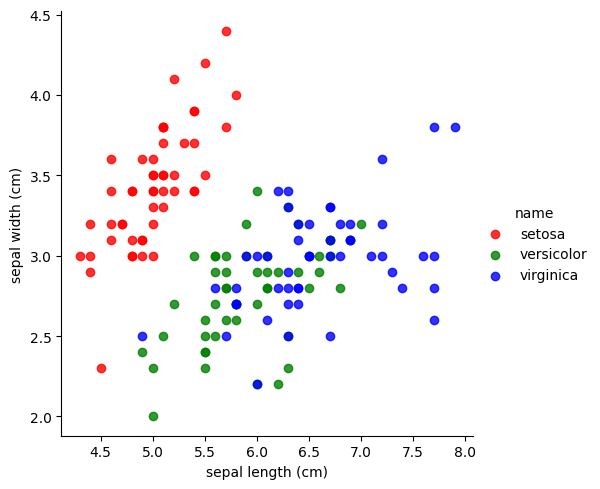

In [ ]:
# plot using seaborn
import seaborn as sns

colors = ['red', 'green', 'blue']
sns.set_palette(sns.color_palette(colors))
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=df, hue='name', fit_reg=False);

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

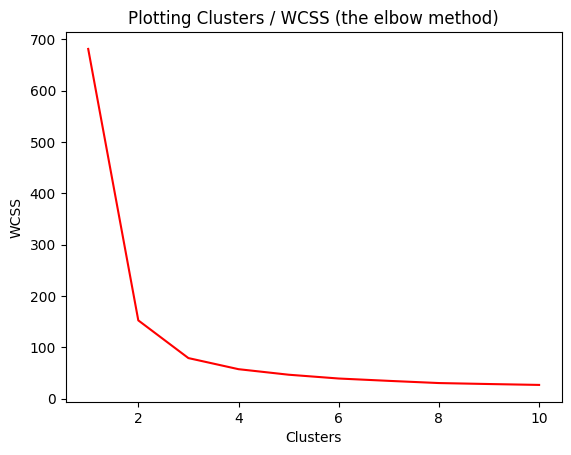

In [ ]:
# plot the elbow curve
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X_values = df.drop(['target', 'name'], axis=1).values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
    km.fit(X_values)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Plotting Clusters / WCSS (the elbow method)')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

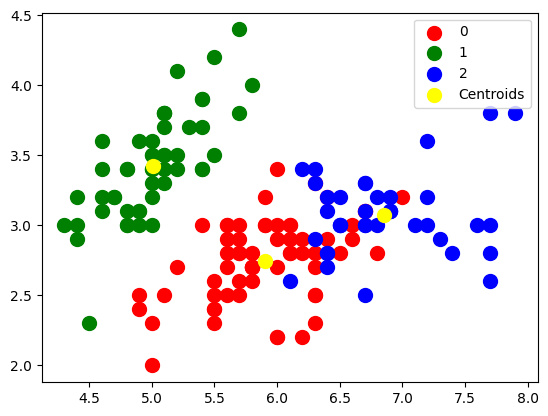

In [ ]:
# kmeans for iris

model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=42)
model.fit(X_values)
y_kmeans = model.labels_

df['cluster'] = y_kmeans

plt.scatter(X_values[y_kmeans==0, 0], X_values[y_kmeans==0, 1], s=100, c='red', label='0')
plt.scatter(X_values[y_kmeans==1, 0], X_values[y_kmeans==1, 1], s=100, c='green', label='1')
plt.scatter(X_values[y_kmeans==2, 0], X_values[y_kmeans==2, 1], s=100, c='blue', label='2')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, color='yellow', label='Centroids')
plt.legend();

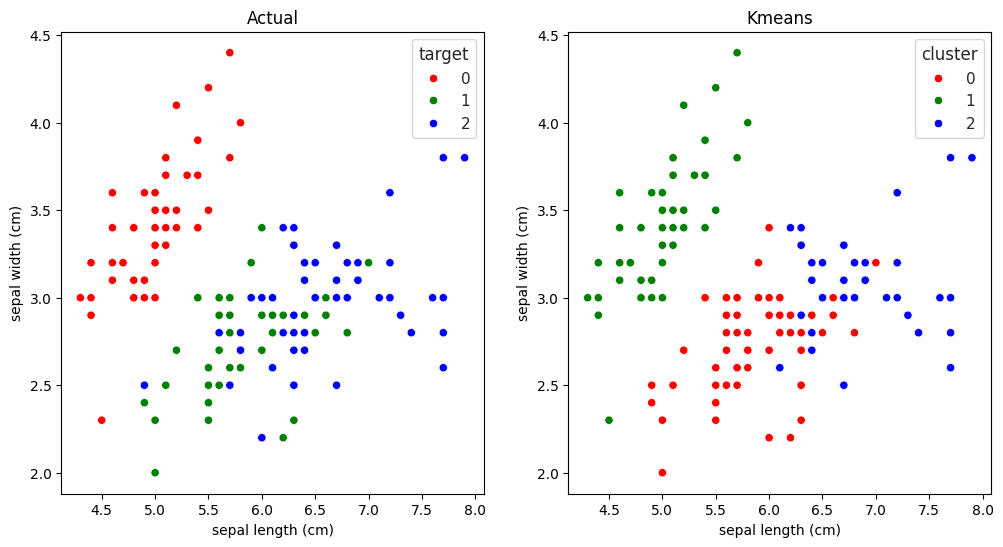

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.set(style='whitegrid')

sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue=df['target'], ax=axes[0], palette=['red', 'green','blue'])
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue=df['cluster'], ax=axes[1], palette=['red', 'green','blue'])
axes[0].set_title('Actual')
axes[1].set_title('Kmeans');

In [ ]:
# try clustering for kdd99
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(X_train[continuous_features])
y_pred = kmeans.predict(X_test[continuous_features])
print(pd.Series(y_pred).value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    15206
1     6970
3     3007
2       12
Name: count, dtype: int64


In [ ]:
# get scores relating to clustering
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

print(f'Completeness: {completeness_score(y_test, y_pred)}')
print(f'Homogeneity: {homogeneity_score(y_test, y_pred)}')
print(f'V-mean: {v_measure_score(y_test, y_pred)}')

Completeness: 0.5089146601751752
Homogeneity: 0.48124270586471085
V-mean: 0.4946920085974606


The V-mean score is really low making this unsuitable for unsupervised training so far. Class imbalance causes problems in clustering. PCA to the rescue.

## PCA

Finds a set of axes (principal components) in high-dimensional space that are ordered by the variance in the data

https://en.wikipedia.org/wiki/Principal_component_analysis

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that aims to simplify complex, high-dimensional datasets while retaining as much of the original information (variance) as possible. Let's elaborate on each part of your concise definition:

**"Finds a set of axes (principal components) in high-dimensional space..."**

Imagine your data points scattered in a space with many dimensions (think of each feature as a dimension). PCA's first crucial step is to identify new, artificial axes within this space. These aren't just any axes; they are special because they are:

* **Linear Combinations of the Original Features:** Each principal component is created by taking a weighted sum of the original features. These weights determine the direction and influence of each original feature on the new component.
* **Orthogonal (Uncorrelated):** These new axes are perpendicular to each other in the high-dimensional space. This is a key property because it ensures that the information captured by one principal component is independent of the information captured by the others. This helps in avoiding redundancy in the reduced representation.

**"...that are ordered by the variance in the data"**

This is where PCA's magic for dimensionality reduction comes in. Once it has identified these principal components, it ranks them based on how much of the total variance in the original data they explain:

* **First Principal Component:** This axis captures the direction of the largest variance in the dataset. In simpler terms, it's the line in the high-dimensional space along which the data points are most spread out. This component holds the most "information" in terms of data variability.
* **Second Principal Component:** This axis is orthogonal to the first and captures the direction of the second largest variance. It represents the next most significant source of variability in the data, after accounting for the variance captured by the first component.
* **Subsequent Principal Components:** This continues for all the original dimensions. Each subsequent principal component captures a decreasing amount of the remaining variance and is orthogonal to all the preceding components.

**Why is this ordering by variance important?**

The beauty of PCA lies in its ability to reduce dimensionality by selecting only the top few principal components that explain a significant portion of the total variance. By discarding the components with low variance, you are essentially discarding the directions in the data where the data points are very close together and thus contain less "unique" information.

**Here's an analogy:**

Imagine you're looking at a 3D object. Its shape and form are described by its length, width, and height. These are your original three dimensions. Now, imagine you want to represent this object in 2D for a drawing while preserving as much of its visual information as possible.

PCA would find the two directions (new axes) that capture the most "spread" or variability of the object's points when projected onto a 2D plane. These two directions would be your first two principal components. By projecting the 3D object onto this 2D plane defined by the top two principal components, you get a good approximation of its shape, even though you've reduced the dimensionality from 3 to 2.

**In summary, PCA works by:**

1.  **Standardizing the data:** Ensuring all features have zero mean and unit variance to prevent features with larger scales from dominating the analysis.
2.  **Calculating the covariance matrix:** This matrix summarizes the relationships and variances between all pairs of original features.
3.  **Finding the eigenvectors and eigenvalues of the covariance matrix:** The eigenvectors represent the principal components (the new axes), and the eigenvalues indicate the amount of variance explained by each corresponding principal component.
4.  **Ordering the eigenvectors by their eigenvalues:** The eigenvector with the highest eigenvalue is the first principal component, the one with the second highest is the second, and so on.
5.  **Selecting the top $k$ principal components:** You choose a subset of the principal components (based on the desired reduced dimensionality or the amount of variance you want to retain).
6.  **Projecting the original data onto the new subspace:** The original data is transformed by multiplying it with the matrix formed by the selected principal components. This results in a lower-dimensional representation of the data.

**Benefits of PCA:**

* **Dimensionality Reduction:** Simplifies data, making it easier to visualize, analyze, and model.
* **Noise Reduction:** By discarding low-variance components, it can help filter out some noise or less important variations in the data.
* **Feature Extraction:** Creates new, uncorrelated features that can sometimes be more informative for machine learning algorithms.
* **Improved Model Performance:** Can sometimes prevent overfitting and improve the performance of machine learning models by reducing the number of features.

PCA is a fundamental technique in data science and is widely used in various applications, including image compression, facial recognition, bioinformatics, and exploratory data analysis.

In [ ]:
# current number of features (dimensions)
print(f'Current number of features (dimensions): {len(X_train[continuous_features].columns)}')

Current number of features (dimensions): 33


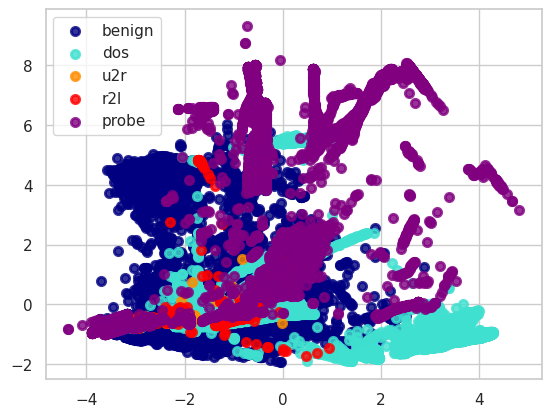

In [ ]:
# visualize dataset with pca to reduce dimensions to 2d
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train[continuous_features])

# plt.figure(figsize=(15,10))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']
for color, cat in zip(colors, category.keys()):
    plt.scatter(X_pca[y_train==cat, 0],
                X_pca[y_train==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

We kind of see some clustering but the spread of the data makes it difficult to see defined clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


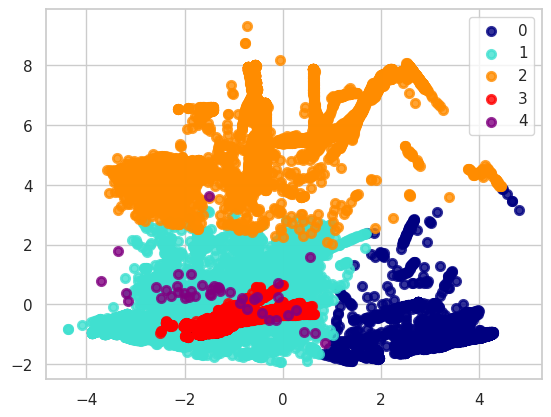

In [ ]:
# train the data using kmeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_train[continuous_features])

# get the labels
y_kmeans = kmeans.labels_

# plot
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color, cat in zip(colors, set(pd.Series(y_kmeans))):
    plt.scatter(X_pca[y_kmeans==cat, 0],
                X_pca[y_kmeans==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

## Benign vs Attack

crosstab: The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear. https://pbpython.com/pandas-crosstab.html

In [ ]:
y_train_attack = y_train.apply(lambda y: 'benign' if y=='benign' else 'attack')
print(y_train_attack.value_counts())
print(pd.crosstab(y_kmeans, y_train_attack))

attack_category
benign    53921
attack    46857
Name: count, dtype: int64
attack_category  attack  benign
row_0                          
0                 27768      99
1                  7450   48067
2                  9788    2286
3                  1851    3426
4                     0      43


We have at least one cluster with a clear majority. Create a three path strategy for dealing with each cluster:

1. For clusters that have an aggregate size of fewer than a threshold, we considert them outliers and assign them to the attack label
2. For clusters with a dominant class we assign the dominant label to the entire cluster
3. Create a classifier for the remaining clusters

### Strategy 1

Apply the dominant label

In [ ]:
# add is_attack for prediction and refit kmeans
X_train_trimmed = X_train[continuous_features]
X_test_trimmed = X_test[continuous_features]

X_train_trimmed.insert(len(X_train_trimmed.columns), 'is_attack', y_train.apply(lambda y: 0 if y=='benign' else 1))
X_test_trimmed.insert(len(X_test_trimmed.columns), 'is_attack', y_test.apply(lambda y: 0 if y=='benign' else 1))

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_trimmed)
y_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# apply the clusters
y_kmeans_pred = kmeans.predict(X_test_trimmed)
X_train_trimmed.insert(len(X_train_trimmed.columns), 'cluster', y_kmeans)
X_test_trimmed.insert(len(X_test_trimmed.columns), 'cluster', y_kmeans_pred)

In [ ]:
# dominant label
import numpy as np

clstr = 0

is_attack = X_test_trimmed[X_test_trimmed.cluster==clstr]['is_attack']
attack_array = np.ones(len(X_test_trimmed[X_test_trimmed.cluster==clstr]))

print(confusion_matrix(is_attack, attack_array))
print(accuracy_score(is_attack, attack_array))

[[   0   22]
 [   0 6944]]
0.9968418030433535


### Strategy 3

Apply a random forest classifier to label cluster

In [ ]:
# use randomforestclassifier to label cluster
from sklearn.ensemble import RandomForestClassifier

clstr = 3

rfc_train = X_train_trimmed[X_train_trimmed.cluster==clstr]
rfc_test = X_test_trimmed[X_test_trimmed.cluster==clstr]

Xtrain = rfc_train.drop(['is_attack'], axis=1)
ytrain = rfc_train['is_attack']
Xtest = rfc_test.drop(['is_attack'], axis=1)
ytest = rfc_test['is_attack']

cls = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
cls.fit(Xtrain, ytrain)
ypred = cls.predict(Xtest)

print(confusion_matrix(ypred, ytest))
print(accuracy_score(ypred, ytest))

[[11663    91]
 [  226  1119]]
0.975799679364837


### Concerns

* Precision: proportion of the predicted items that are correctly predicted
* Recall: proportion of the actual items that are correctly predicted
* Never make adjustments to your model based on results of the test set
* Class imbalance and lack of training data
* Spend time to explore and understand the data